# Tutorial Exercises

These tutorial exercises are designed to help you prepare for the first assignment.

As a researcher, there are two distinct phases to data analysis:

* Understanding the dataset yourself - this involves making lots of quick plots and descriptive statistics to
    * check for outliers
    * find out the data distributions
    * look for differences between categories
    * look for associations between variables
<br>    
* Preparing a report for a reader - this involves a focus on readability and the reader
    * explain any key features of the dataset 
    * highlighting key results with descriptive statistics and figures
    * figures should be well labelled and tweaked to make your point as clearly as possible
    * there should be clear, readable explanatory text
    * for most readers/clients, non technical language should be used 
    * in all cases, jargon should be avoided
    
In these tutorial exercises, you will complete some guided tasks (and some open-ended ones) to explore the dataset for yourself.

For the hand-in assignment, you will produce a report on the same dataset for a specified reader.

<font color=red>

## Introduction for tutors:

The idea here is primarily to get students 'playing around' with the data - let them make lots of plots and see what they can see. The refined report will come later (for homework).

I find students can be quite focussed on the process of making plots etc actually work (ie the coding - or in the past the process of drawing it with pencil and paper). Of course what we really want them to do is engage with the material thoughtfully as well!

If students object to the open-ended nature of this exercise perhaps you could explain to them that the learning objective is to give them practice in interpreting graphs and descriptive statistics, looking at the output, think about what it means and coming up with some follow-up questions.

A secondary objective is to give them lots of practice with producing graphs and tables and a sense of which settings work well, when.

Below I have my own 'answers' to the questions - as you can see it's really just rough work exploring the dataset. This is the type of thing I am hoping students would produce!

NOTE - one exercise asks them to recognize Z-scored variables. z-scoring was covered in the reading and lecture so this is just consolidation; it might be worth checking that they got it.

</font>

## Crime Survey Data

We will work with a dataset extracted from the Crime Survey England and Wales 2013.

I obtained the data from the UK Data Service, a data repository run by the UK Research Councils. This text is from their introduction to the dataset:

*The Crime Survey for England and Wales (CSEW) is a face-to-face victimisation survey in which
people resident in households in England and Wales are asked about their experiences of a range of
crimes in the 12 months prior to the interview. Respondents to the survey are also asked about their
perceptions of crime and attitudes towards crime related issues such as the police and criminal justice
system.*

The dataset I have given you contains only some of the questions that respondants were asked, containing information about the respondants' individual demographic features, neighbourhood, perceptions of crime and confidence in the police.

The brief for the  hand-in report will be to write a short report for the Home Secretary addressing two topics:
1. Which groups are the most likely to be victims of crime? and 
2. What factors affect confidence in policing?, 

Note that the idea is to write for a generic Home Secretary  - they have responsibility for Law and Order and as a politician are interested in how different sections of the public perceive these issues. You can assume they have no statistical training. However there is no need to accommodate the political attitudes or personal characteristics of any particular Home Secretary.

In these preparatory exercises you will play around with the data to try and work out which factors are important predictors of that confidence.

I have put my own conclusions at the bottom of this page - this is just to give an idea of the kinds of things you might look at.


#### Note

The survey was conducted in 2013 in the UK. Events of recent years may have affected the confidence of certain groups in the police; this would not be reflected in the data used here.


### Set up Python libraries

In [33]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

### Import the data

Download the dataset from Canvas and import them as a dataframe called `crime`

In [34]:
# WARNING! This will only work once you:
# download the datafile and 
# put it in the right place on your computer!
crime  = pd.read_csv('../data/CrimeData_2013.csv')
crime

,ID,Sex,Age,AgeGroup,EthnicGroup,Education,SES,DeprivationIndex,Victim,confpolice,antisoc
0,135230170.0,Male,45.0,4,White,University,2.0,3.0,0.0,-2.290506,-3.42
1,135230210.0,Male,28.0,2,White,University,1.0,4.0,0.0,0.349198,0.52
2,135231010.0,Female,58.0,5,Black or Black British,99,5.0,2.0,0.0,-0.381797,-2.27
3,135231210.0,Male,70.0,6,Asian or Asian British,GCSE,3.0,4.0,0.0,99.000000,99.00
4,135233210.0,Female,64.0,5,White,Other,5.0,5.0,0.0,0.613168,-0.84
...,...,...,...,...,...,...,...,...,...,...,...
9295,147638210.0,Male,43.0,3,White,University,1.0,99.0,0.0,1.029429,-0.31
9296,147639090.0,Male,70.0,6,White,99,5.0,99.0,0.0,-1.051876,0.45
9297,147639130.0,Female,80.0,7,White,99,5.0,99.0,0.0,-0.808211,-0.27
9298,147639250.0,Male,86.0,7,White,University,1.0,99.0,0.0,-1.711802,0.56


### Variables in the dataset

Information about the respondant and their neighbourhood:

* **ID** a unique number for each participant
* **Sex**
* **Age** in years
* **Age Group** ages in 10-year groups
* **Ethnic Group** the categories given are the ones recorded in the original survey
* **Education** highest level of education completed; modern British qualifications are used as a short hand for any equivalent, for example 'A-Levels' includes any equivalent of completing high school to age 18.
* **SES** socio-economic status
    * 1. Managerial and professional occs 
    * 2. Intermediate occs 
    * 3. Small employers and own account workers 
    * 4. Lower supervisory and technical occupations 
    * 5. Semi-routine and routine occupations 
    * 6. Never worked and long term unemployed 
    * 7. Full-time students 
    * 8. Not classified
* **Deprivation Index** this is a neighbourhood-level measure of poverty, in qunitiles
    * 1 is the most deprived (poorest) 20% of neighbourhoods
    * 5 is the least deprived (wealthiest) 20%
* **Victim** has the respondant been a victim of crime in the last 12 months?


The following variables are **constructed** variables summarizing the respondant's attitudes on the following points:

* **confpolice** how confident are you in the policing of your neighbourhood?
* **antisoc** how much antisocial behaviour is there in your neighbourhood?
  
Each variable actually reflects a combination of the respondant's answers to several questions; for example **antisoc** is based on several questions asking about different antisocial behaviours- 'is there vandalism in your neighbourhood', 'are there gangs present in your neighbourhood', 'is there a fly tipping problem in your neighbourhood' etc):




## Check for bad values

Are there any outliers of filler values (such as `9999`) in the dataset?
* check, and deal with them appropriately

<font color=red>I would suggest starting with `df.describe()`

In [35]:
# Your code here
crime.describe()

,ID,Age,AgeGroup,SES,DeprivationIndex,Victim,confpolice,antisoc
count,9.300000e+03,9300.00000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000
mean,1.387841e+08,51.52828,4.155376,2.946559,10.769032,0.156022,6.589355,6.643392
std,4.422820e+06,18.81575,1.830384,1.852283,26.129501,0.362895,24.696669,24.788734
min,1.352302e+08,16.00000,1.000000,1.000000,1.000000,0.000000,-3.894633,-4.010000
25%,1.363271e+08,36.00000,3.000000,1.000000,2.000000,0.000000,-0.361492,-0.530000
50%,1.367402e+08,51.00000,4.000000,3.000000,3.000000,0.000000,0.156296,0.240000
75%,1.371590e+08,66.00000,6.000000,5.000000,5.000000,0.000000,0.663932,0.990000
max,1.476393e+08,99.00000,7.000000,8.000000,99.000000,1.000000,99.000000,99.000000


<font color=red>
We notice that the maximum value for several variables is 99.

Looking at the 75th centile (eg for `deprivation index` and `confpolice`), 99 may be a filler value. For age, maybe not as the 75th centile is not so far from 99 and 99 could be a real age.

Let's plot the suspicious variables to find out more:
</font>

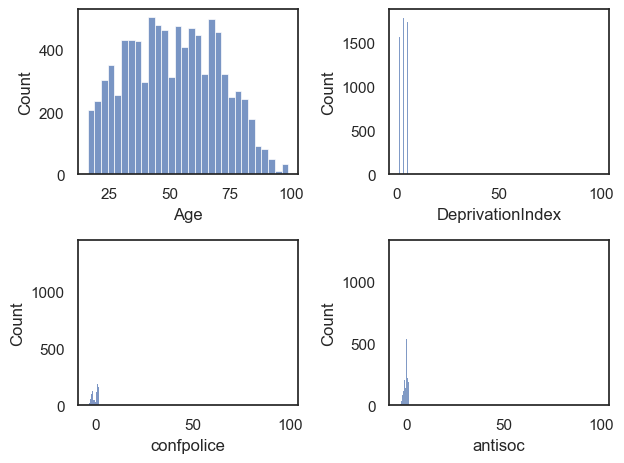

In [36]:
plt.subplot(2,2,1)
sns.histplot(data=crime, x='Age')
plt.subplot(2,2,2)
sns.histplot(data=crime, x='DeprivationIndex')
plt.subplot(2,2,3)
sns.histplot(data=crime, x='confpolice')
plt.subplot(2,2,4)
sns.histplot(data=crime, x='antisoc')
plt.tight_layout()
plt.show()

<font color='red'>
OK it looks like 99 was a filler value for `DeprivationIndex`, `confpolice` and `antisoc` as for those variables the rest fo the data are clustered miles away from 99.

I will replace the 99's with `NaN` for those variables and replot.
</font>

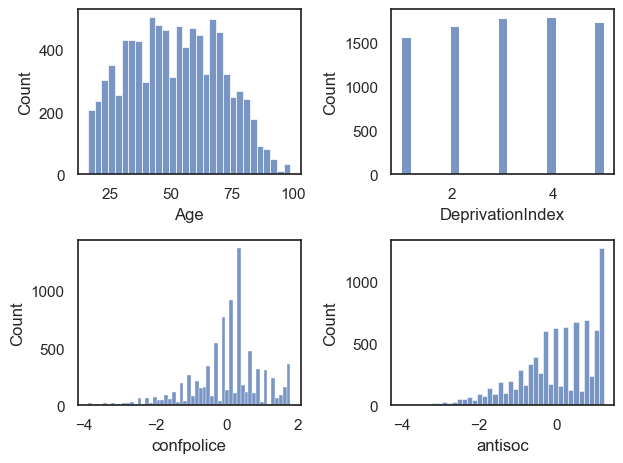

In [37]:
crime.DeprivationIndex.replace(99, np.NaN, inplace=True) 
crime.confpolice.replace(99, np.NaN, inplace=True) 
crime.antisoc.replace(99, np.NaN, inplace=True) 

plt.subplot(2,2,1)
sns.histplot(data=crime, x='Age')
plt.subplot(2,2,2)
sns.histplot(data=crime, x='DeprivationIndex')
plt.subplot(2,2,3)
sns.histplot(data=crime, x='confpolice')
plt.subplot(2,2,4)
sns.histplot(data=crime, x='antisoc')
plt.tight_layout()
plt.show()

<font color=red>
OK that seems to have worked for `DeprivationIndex`, `confpolice` and `antisoc` as there are now no outliers (the histograms still look horrible due to the choice of bins; we could fix that by specifying the argument `bins=np.arange(-5,5)` or similar)

For `Age` I am still not sure what to do with those 99s, so I am going to zoom in on the tail of the distribution:

(0.0, 40.0)

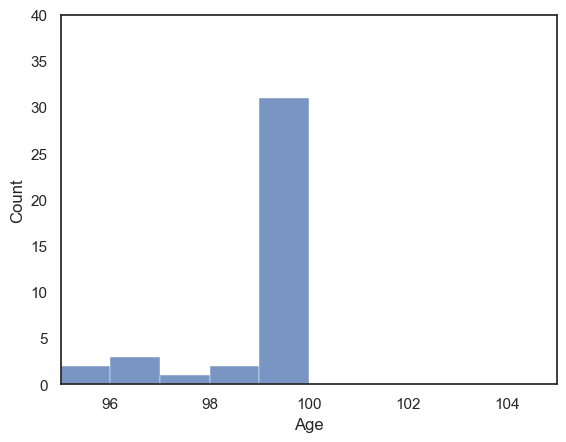

In [38]:
sns.histplot(data=crime, x='Age', bins=range(105))
plt.xlim([95 ,105])
plt.ylim([0, 40]) # I added this after the first time I made the plot!

<font color=red>

There are a suspiciously large number of 99 year olds (ie, many more 99- than 98-year-olds) so I am going to conclude it was a filler value and replace them with `NaN`.

This was not a good choice of filler value! They should have used 999 instead!

</font>

In [44]:
crime.Age.replace(99, np.NaN, inplace=True) 


### Have we got rid of all the 99's now?

We actually haven't. When we checked the dataframe using `df.describe()`, we only checked the numerical variables, but some of the variables coded as strings also have missing values coded as 99.

Have a look back at the dataframe and see if you can spot (and remove) them...

Let's check what string variables were in the dataframe:

In [39]:
# Display the dataframe again to remind yourself what string variables there are
crime.head()

,ID,Sex,Age,AgeGroup,EthnicGroup,Education,SES,DeprivationIndex,Victim,confpolice,antisoc
0,135230170.0,Male,45.0,4,White,University,2.0,3.0,0.0,-2.290506,-3.42
1,135230210.0,Male,28.0,2,White,University,1.0,4.0,0.0,0.349198,0.52
2,135231010.0,Female,58.0,5,Black or Black British,99,5.0,2.0,0.0,-0.381797,-2.27
3,135231210.0,Male,70.0,6,Asian or Asian British,GCSE,3.0,4.0,0.0,NaN,NaN
4,135233210.0,Female,64.0,5,White,Other,5.0,5.0,0.0,0.613168,-0.84


Now we check whether there are any '99's using `df.column.unique()`:

In [40]:
print(crime.Sex.unique())
print(crime.EthnicGroup.unique())
print(crime.Education.unique())

['Male' 'Female']
['White' 'Black or Black British' 'Asian or Asian British'
 'Chinese or other' '99' 'Mixed']
['University' '99' 'GCSE' 'Other' 'ALevel']


Now we replace the 99's.

**Hint:** the 99's in these strong variables are the string '99', not the number `99`!

In [41]:
crime.Sex.replace('99', np.NaN, inplace=True) 
crime.EthnicGroup.replace('99', np.NaN, inplace=True) 
crime.Education.replace('99', np.NaN, inplace=True) 

# Check it worked!
print(crime.Sex.unique())
print(crime.EthnicGroup.unique())
print(crime.Education.unique())

['Male' 'Female']
['White' 'Black or Black British' 'Asian or Asian British'
 'Chinese or other' nan 'Mixed']
['University' nan 'GCSE' 'Other' 'ALevel']


## Explore the distribution of the variables

Now you will explore each variable individually by making suitable graphs. Complete each code block to produce a suitable plot or descriptive statistic. There are no right answers but in each case you should look at what you produced and evaluate whether your learned something from it!

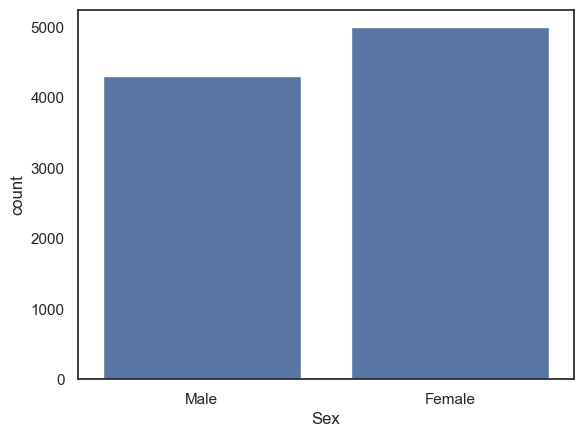

In [45]:
# Are there more men or women in the sample?
sns.countplot(data=crime, x='Sex')
plt.show()

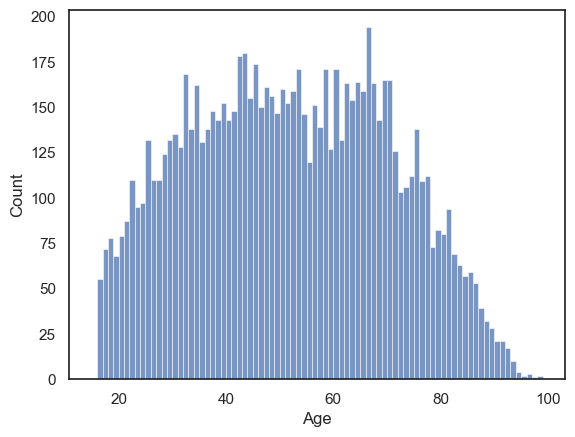

16.0
98.0


In [46]:
# What ages were included in the survey and what is the distribution of respondants' ages?
sns.histplot(data=crime, x='Age', bins=range(15,100))
plt.show()
print(crime.Age.min())
print(crime.Age.max())

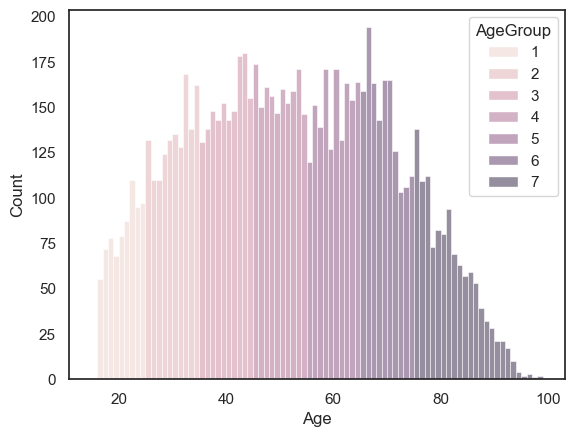

In [47]:
# What are the bins used for the variable AgeGroup?
# hint: the `hue` argument of sns.histplot can help you here
sns.histplot(data=crime, x='Age', hue='AgeGroup', bins=range(15,100))
plt.show()

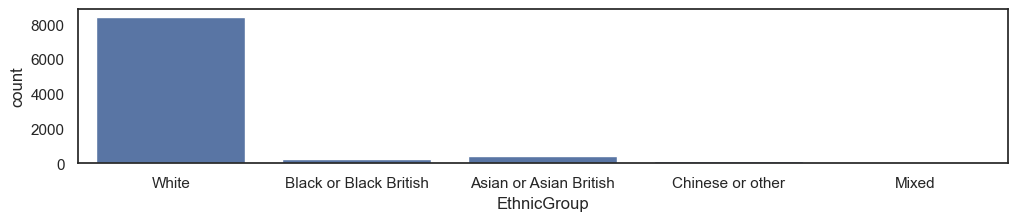

EthnicGroup
Asian or Asian British     390
Black or Black British     255
Chinese or other           116
Mixed                       81
White                     8445
Name: ID, dtype: int64

In [48]:
# How many respondants came from each ethnic group?
# Hint: you may need to resize the firgue so the x-axis labels are readable
plt.figure(figsize=(12,2))
sns.countplot(data=crime, x='EthnicGroup')
plt.show()
crime.groupby('EthnicGroup').ID.count() # I counted the IDs in each ethnic group - without this you woudl get a table giving the counts for each variable (minus missing data) in each ethnic group

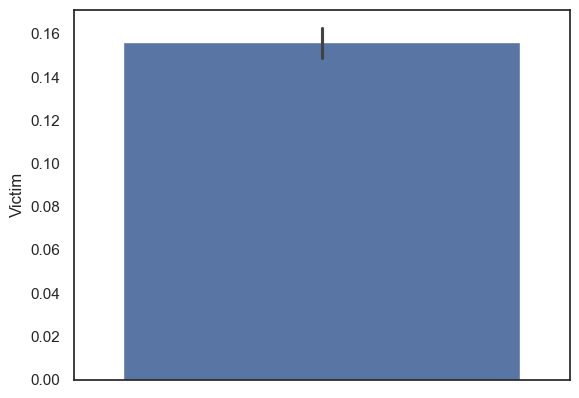

0.1560215053763441

In [14]:
# What proportion of respondants have been a victim of crime in the last 12 months?
# Hint: `victim` is coded as 1 or 0
sns.barplot(data=crime, y='Victim')
plt.show()
crime.Victim.mean() # get nummerical value

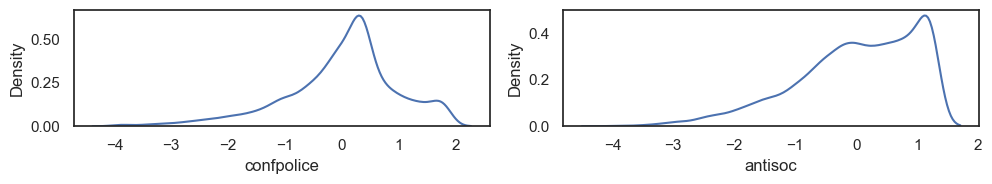

(None, None)

In [15]:
# For each of the constructed variables (confpolice and antisoc) plot the distribution
plt.figure(figsize=(10,2))
plt.subplot(1,2,1), sns.kdeplot(data=crime, x='confpolice')
plt.subplot(1,2,2), sns.kdeplot(data=crime, x='antisoc')
plt.tight_layout(), plt.show()

**NOTE -** 
We note that these variables take positive and negative values

* For confidence in the police there is a strong spike around zero (many people have a neutral attitude - or are they disengaged or have no experience with the police? - later we will break this down by victims/non victims) - there is also a strong positive tail
* For perceptions of 'antisocial behaviour in my neighbourhood' there is a strong positive tail - could it depend on neighbourhood characteristics?


In [16]:
# Is there a correlation between people's experience of antisocial behaviour, and their confidence in the police?
crime.confpolice.corr(crime.antisoc)

0.22781299372757607

<font color=red>
Yes there is a positive correlation, whihc means that those who report higher levels of antisocial behaviour in their neighbourhood also have high confidence in the police. Students might like to consider whether this is expected or surprising (I think it is somewhat surprising!). 
    
Later we will see that theree may be a *lurking variable* that explains this correlation, namely that older people tend to report higher levels of antisocial behvaiour (despite presumably living int he same neighb ourhood as everyone else) and also tend to have higher confidence in the police.
</font>

In [17]:
# For the attitude variables (confpolice and antisoc) what is the mean and standard deviation?
# Can you guess how these attitude variables ended up with that mean and standard deviation (think back to the section on standardizing data)?
crime.agg({'confpolice':['mean', 'std'], 'antisoc':['mean', 'std']})

,confpolice,antisoc
mean,-2.864762e-17,0.000870
std,1.000000e+00,1.000872


The means are 1 and the sd is 0 for each - they have been Z-scored. 

<font color=red>
You may need to discuss the use of scientific notation with students, who might not understand e-17 etc 

You might need to alert students to the fact that a tiny tiny number is basically zero (due to noise/rounding error)

Note that you can see the values more clearly if you suppress scientific notation by including the code snippet `pd.options.display.float_format = '{:.2f}'.format` - you could add it to the 'load libraries block` or add it here (but it then applies to any code blocks you run in future)

eg:
</font>

In [18]:
#pd.options.display.float_format = '{:.2f}'.format
crime.agg({'confpolice':['mean', 'std'], 'antisoc':['mean', 'std']})


,confpolice,antisoc
mean,-2.864762e-17,0.000870
std,1.000000e+00,1.000872


In [19]:
# Which variables have a lot of missing data?
# HINT use df.isna() and sum()
crime.isna().sum()

ID                     0
Sex                    0
Age                    0
AgeGroup               0
EthnicGroup           13
Education           1993
SES                    0
DeprivationIndex     748
Victim                 0
confpolice           619
antisoc              624
dtype: int64

<font color = red>
Most of the demgraphic variables are near-complete (the exception is `Education`)

The constructed attitude variables (`confpolice` and `antisoc` are incomplete for a high number of respondants.

You or your students might be interested in whether non-response is higher for certain groups and this about why that might be - for example might migrants be less likely to report their level of education due to lack of familiarity with the categories offered, which are based ont he UK system?

Note that for the attitude variables, the real reason for the missing responses it that the survey was given in a partical form to different sets of respondants (ie not everyone in the dataset was asked those questions)

Annoyingly I can find no straightforward way to integrate `df.isna()` and `df.groupby()` - there are ways but they are all fiddly. You can check using df.count() and df.size() as below but only for one variable at a time.

If anyone knows a good solution to this please let me know!

Incidentally, playing around with this I think the groups with the lower response rates are 'Chinese and Other' ethnic group and the 'Other' education group

Here is an example:
</font>

In [20]:
crime.groupby('EthnicGroup').Education.count()/crime.groupby('EthnicGroup').Education.size()

EthnicGroup
Asian or Asian British    0.774359
Black or Black British    0.866667
Chinese or other          0.862069
Mixed                     0.839506
White                     0.782475
Name: Education, dtype: float64

## Who is most likely to be a victim of crime?

Explore which demographic variables make a difference to the chance of being a victim of crime. Are more men than women victims of crime? etc

**HINT** as `Victim<` is coded as 1 (if they have been a victim of crime in the past 12 months) and 0 (otherwise), you can obtain the proportion of people who have been a victim by taking the mean value of the column `Victim`.

You can also use `sns.barplot()` with the `x` and `hue` arguments to plot the proportion who are victims of crime within each category (each age group, etc).


In [21]:
# You will add several code blocks here to explore the data

<font color = red>
The most likely people to be victims of crime are young people, students, and those living in areas of high deprivation
</font>

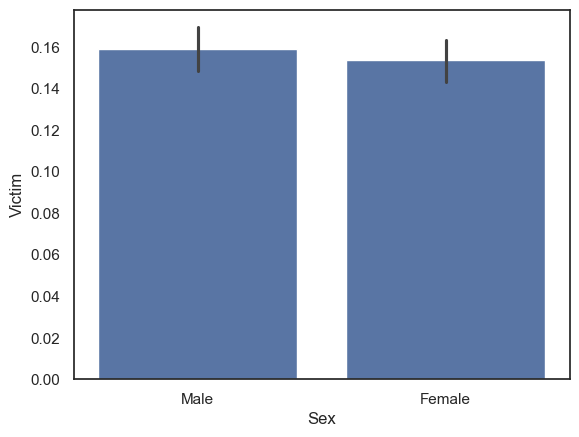

In [22]:
sns.barplot(data=crime, x='Sex', y='Victim')
plt.show()

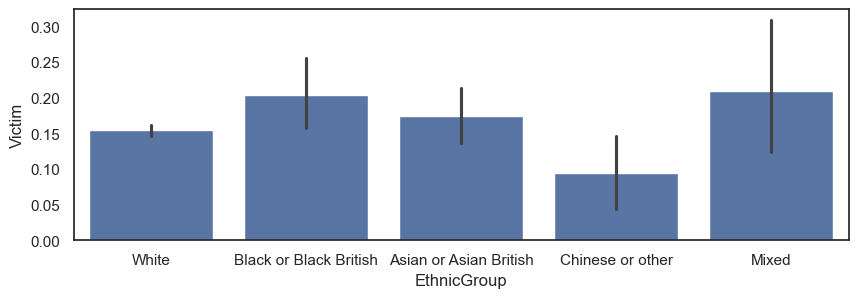

In [23]:
plt.figure(figsize=(10,3))
sns.barplot(data=crime, x='EthnicGroup', y='Victim')
plt.show()

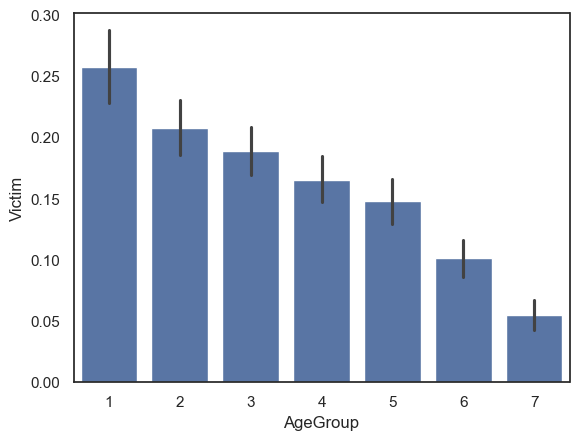

In [24]:
sns.barplot(data=crime, x='AgeGroup', y='Victim')
plt.show()

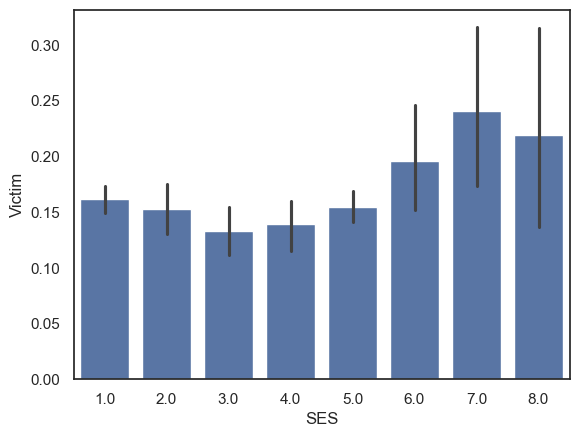

In [25]:
sns.barplot(data=crime, x='SES', y='Victim')
plt.show()

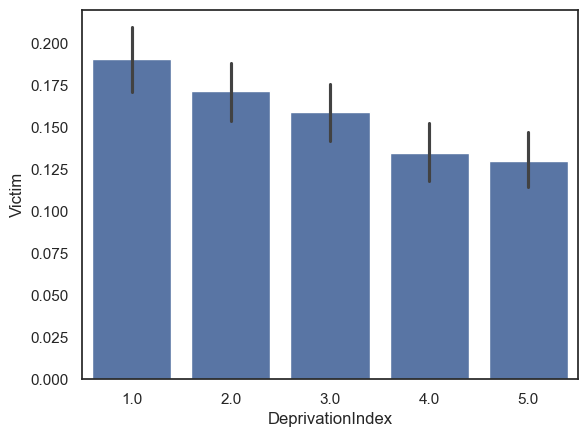

In [26]:
sns.barplot(data=crime, x='DeprivationIndex', y='Victim')
plt.show()

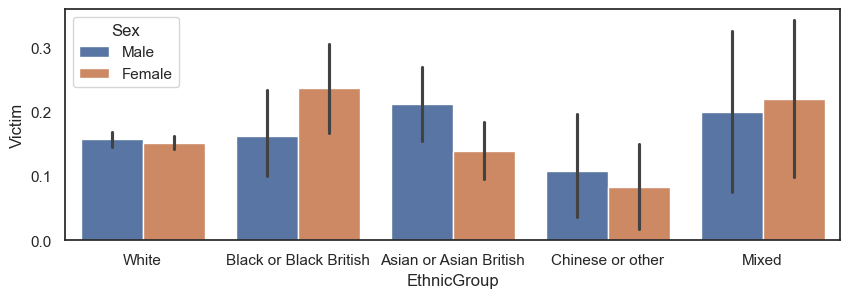

In [27]:
plt.figure(figsize=(10,3))
sns.barplot(data=crime, hue='Sex', y='Victim', x='EthnicGroup')
plt.show()

## Disaggregate the data

In the lecture we heard that a pattern that holds in one group of respondants may not hold for another group. We can check this by **disaggregating** the data.

#### Are students victims of crime because they live in deprived neighbourhoods? 

Try plotting the proportion of people who are victime of crime broken down by deprivation index (as above), but further broken down by SES

**HINT:** Use the `hue` argument to get clusters of bars for each level of SES

<font color = red>
Interestingly, whilst for most people there is a relationship between deprivation index and likeligood of being a victim of crime, this relationship breaks down for under 25's and for those in the student, unemployed and unclassified SES brackets.
</font>

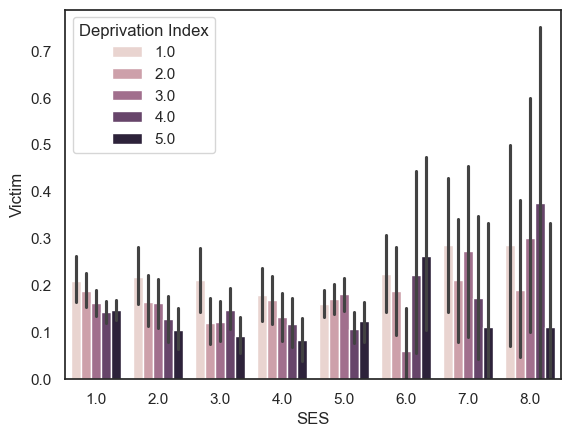

In [28]:
sns.barplot(data=crime, x='SES', y='Victim', hue='DeprivationIndex')
plt.legend(title='Deprivation Index')
plt.show()

#### Do the patterns hold for all ethnicities?

The proportion of people who are victims of crime falls with age overall.

But is this true for all ethnicities?

The survey respondants were overwhelmingly white, so even if there was a quite different pattern of victimization in other ethnic groups, when we simply average everyone together this effect would be 'swamped'

Try plotting the proportion of people who are victims, broken down by `AgeGroup`, and further broken down by `EthinicGroup`

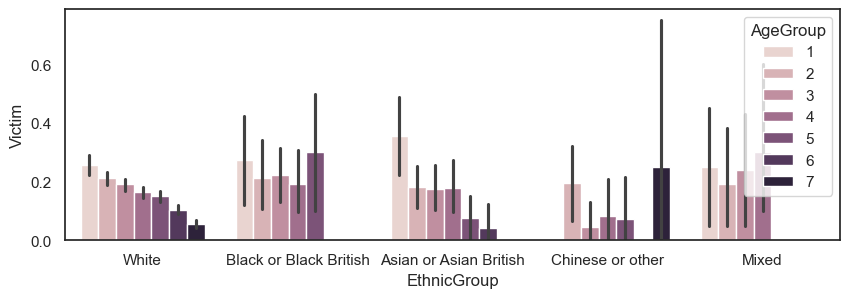

In [50]:
plt.figure(figsize=[10,3])
sns.barplot(data=crime, hue='AgeGroup', y='Victim', x='EthnicGroup')
plt.legend()
plt.show()

<font color=red>
    
Indeed, the pattern seen for white people is not convincingly replicated in other ethnic groups.

An important caveat is that although we may be unable to really see a pattern in the non-white groups as the number of respondants in these groups is much smaller.

You could discuss with students the implications of this; the survey is a representative sample of the UK population (which is why non-white groups have fewer people sampled). So the overall (aggregate) results represent the average experience int he country. But if the pattern was very different in minority groups, this would not be apparent (unless we disaggregate the data).

Undersampling of minority ethnic groups has lead to the 'masking' of unequal outcomes (for example, black women are much more likely to suffer harm in childbirth in the UK and the USA, which for a long time was not noticed because no-one disaggregated the data). This is also an issue that affects women, not because women are a minority group, but because they are understudied, especially in medical research (as discussed int he Lecture)

</font>

## Do attitudes differ depending on demographics?

Looking at the attitude variables (`confpolice` and `antisoc`), which demographic factors seem to influence these?

I found it most helpful to make barplots for each attitude variable, broken down by demographic factors (such as deprivation index or age group). 

Go ahead and explore the breakdown of `confpolice` and `antisoc` by `AgeGroup`, `EthnicGroup` and `DeprivationIndex`

<font color=red>
    
You may notice that respondants' experience of antisocial behaviour tends to be higher in groups who are more likely to be victims of crime (young people, low SES and those living in areas of high deprivation).

</font>


### Age

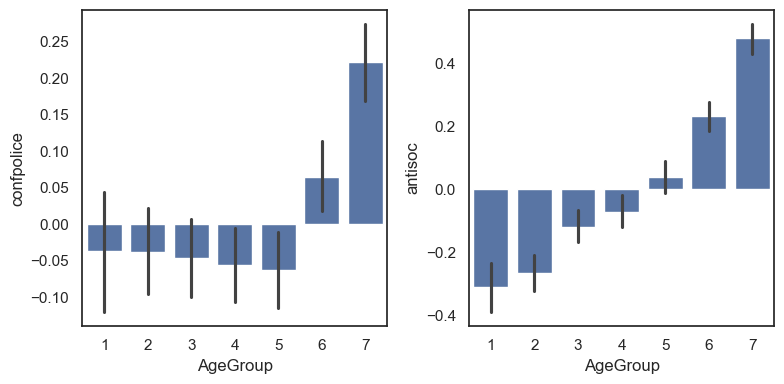

In [30]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1), sns.barplot(data=crime, y='confpolice', x='AgeGroup')
plt.subplot(1,2,2), sns.barplot(data=crime, y='antisoc', x='AgeGroup')
plt.tight_layout()
plt.show()

## Deprivation Index

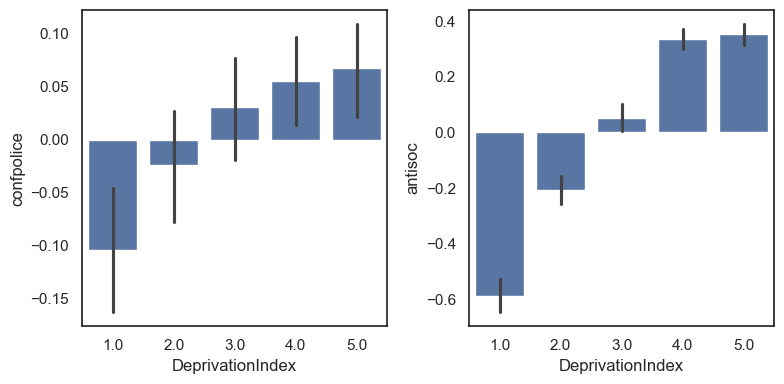

In [31]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1), sns.barplot(data=crime, y='confpolice', x='DeprivationIndex')
plt.subplot(1,2,2), sns.barplot(data=crime, y='antisoc',  x='DeprivationIndex')
plt.tight_layout()
plt.show()

## Ethnic Group

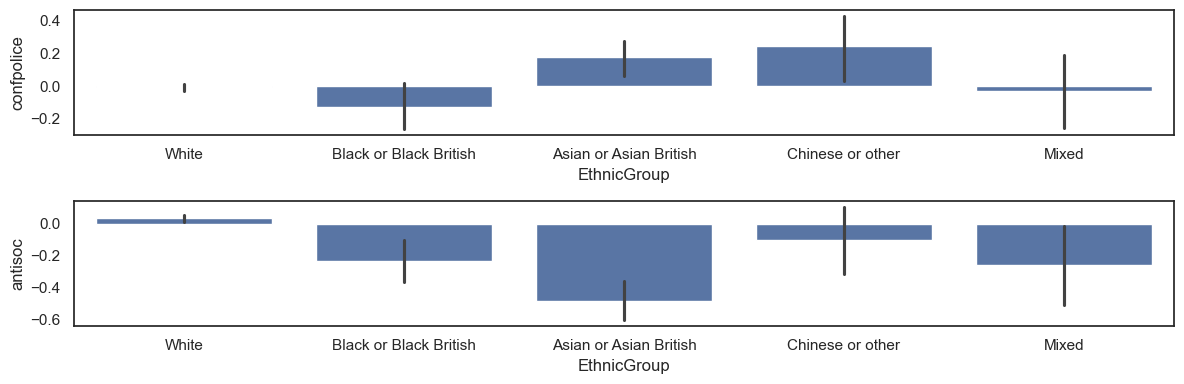

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(2,1,1), sns.barplot(data=crime, y='confpolice', x='EthnicGroup')
plt.subplot(2,1,2), sns.barplot(data=crime, y='antisoc',  x='EthnicGroup')
plt.tight_layout()
plt.show()

## Lurking Variables?

Earlier we noticed that people who reported higher levels of antisocial behaviour in their neighbourhood also had higher confidence in the police, which is somewhat surprising.

Looking at how `confpolice` and `antisoc` vary by `AgeGroup`, can you think of a spurious explanation for this correlation?

## Conclusions

Now think about how you might summarize what you have learned from the dataset

* who is most likely to be a victim of crime?
* who is most likely to report high levels of antisocial behaviour in their neighbourhood?
* what factors predict confidence in the police and experience of antisocial behaviour?
* what are the limitations of the survey? Are the experiences of all groups equally well documented?